#DATA & ANALYTICS

----------------------------
EJERCICIO 01.

In [14]:
#cargamos las librerias
import pandas as pd
import seaborn as sns # visualización
import statistics as stats # estadística
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis

## 1. Importamos los datos

In [15]:
#cargamos la data desde nuestra PC
from google.colab import files
files.upload()

Saving Data_Nutricion_grupos.xlsx to Data_Nutricion_grupos (1).xlsx


{'Data_Nutricion_grupos.xlsx': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x06w\\T\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08

In [16]:
#levantamos la data con pandas
data_nutricion = pd.read_excel('Data_Nutricion_grupos.xlsx')
data_nutricion.head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos
0,Persona 1,155.7,16.0,71.2,35.7,29.576170,90.0,98.0,0.918367,0.578035,36.446202,45.250304,13.0,27.0,32.0,34.0,A
1,Persona 2,166.5,16.0,61.0,31.8,22.364707,80.9,100.5,0.804975,0.485886,28.790714,43.437664,5.0,19.0,15.0,22.0,A
2,Persona 3,151.3,16.0,49.1,30.5,21.623567,72.0,86.0,0.837209,0.475876,29.867419,34.435097,13.0,18.0,18.0,17.0,A
3,Persona 4,151.7,16.0,54.6,32.6,23.117479,NaN,88.4,0.841629,0.490442,27.867640,39.384269,5.0,19.0,15.0,18.0,A
4,Persona 5,160.3,16.0,58.0,30.1,22.260196,NaN,97.9,0.813075,NaN,30.276688,40.439521,10.0,19.0,20.0,19.0,A


In [17]:
data_nutricion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

### Separamos la data en 2 partes para imputar

In [18]:
# Data numérica
#cols_num=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC','circun_cintura','cadera','ind_cintura_cadera','ind_cintura_estatura','por_grasa_corporal','masa_corporal_magra_kg','pliegue_cutaneo_BICEPS','pliegue_cutaneo_TRICEPS','pliegue_cutaneo_ESCAPULAR','pliegue_cutaneo_SUPRAILIACO']
data_nutricion_num = data_nutricion.loc[:, ['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC','circun_cintura','cadera','ind_cintura_cadera','ind_cintura_estatura','por_grasa_corporal','masa_corporal_magra_kg','pliegue_cutaneo_BICEPS','pliegue_cutaneo_TRICEPS','pliegue_cutaneo_ESCAPULAR','pliegue_cutaneo_SUPRAILIACO']] 
cols_num=data_nutricion_num.columns
data_nutricion_num.describe()

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
count,624.000000,645.000000,629.000000,623.000000,640.000000,637.000000,647.000000,639.000000,636.000000,650.000000,648.000000,652.000000,652.000000,652.000000,652.000000
mean,158.821474,14.753488,56.943561,32.138042,22.426463,74.517425,89.868470,0.831048,0.470617,23.538992,43.379476,9.181748,15.647239,14.383436,14.679448
std,7.477915,1.054276,8.592938,2.156724,3.046897,6.915982,7.210739,0.054721,0.046455,7.860764,6.928913,5.661837,5.692567,5.307465,5.953868
min,135.600000,0.000000,33.900000,24.500000,14.537886,55.000000,69.800000,0.654018,0.362319,4.214310,28.498090,2.000000,5.000000,5.000000,3.000000
25%,153.700000,14.000000,51.000000,30.700000,20.274879,70.000000,85.000000,0.794296,0.438694,15.971877,38.154599,5.000000,11.000000,10.000000,10.000000
50%,158.200000,15.000000,55.800000,32.000000,22.174447,73.600000,89.000000,0.827897,0.464779,26.094372,42.357287,8.000000,16.000000,14.000000,15.000000
75%,163.700000,15.000000,61.700000,33.500000,23.914351,78.000000,94.000000,0.866831,0.494481,30.073493,48.120857,12.000000,19.000000,18.000000,19.000000
max,188.600000,17.000000,91.100000,39.200000,36.708603,107.500000,120.800000,1.026528,0.704411,39.445282,71.568947,90.000000,39.000000,35.000000,35.000000


In [19]:
# Data categórica 

data_nutricion_cat = data_nutricion.loc[:, ['Individuo','Grupos']] 
data_nutricion_cat.head(6)

,Individuo,Grupos
0,Persona 1,A
1,Persona 2,A
2,Persona 3,A
3,Persona 4,A
4,Persona 5,A
5,Persona 6,A


## 2. Información de datos numéricos perdidos

In [20]:
# Observamos los datos perdidos
data_nutricion_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        624 non-null    float64
 1   edad                         645 non-null    float64
 2   peso_kg                      629 non-null    float64
 3   circun_cuello                623 non-null    float64
 4   IMC                          640 non-null    float64
 5   circun_cintura               637 non-null    float64
 6   cadera                       647 non-null    float64
 7   ind_cintura_cadera           639 non-null    float64
 8   ind_cintura_estatura         636 non-null    float64
 9   por_grasa_corporal           650 non-null    float64
 10  masa_corporal_magra_kg       648 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

## 3. Imputación paramétrica

In [21]:
# Reemplazando con la median de cada columna: Variables Cuantitativas

data_nutricion_num2 = data_nutricion_num.apply(lambda x: x.fillna(x.median()), axis = 0)

cols_num = data_nutricion_num2.columns

data_nutricion_num2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [22]:
# Corregimos la variable edad =0
data_nutricion_num2.loc[data_nutricion_num2['edad'] == 0, 'edad'] = int(data_nutricion_num2['edad'].median())
data_nutricion_num2['edad'] = data_nutricion_num2['edad'].astype('int')

In [23]:
# identificamos outliers: pliegue_cutaneo_BICEPS 

pc_out = data_nutricion_num2.pliegue_cutaneo_BICEPS.quantile(0.99)
print(pc_out)

data_nutricion_num2.pliegue_cutaneo_BICEPS[data_nutricion_num2.pliegue_cutaneo_BICEPS > pc_out]

# valor sospechoso 90.0

21.49000000000001


8      25.0
19     23.0
72     22.0
187    26.0
362    22.0
386    23.0
398    90.0
Name: pliegue_cutaneo_BICEPS, dtype: float64

In [24]:
# Corregimos la variable pliegue_cutaneo_BICEPS =90
data_nutricion_num2.loc[data_nutricion_num2['pliegue_cutaneo_BICEPS'] == 90, 'pliegue_cutaneo_BICEPS'] = int(data_nutricion_num2['pliegue_cutaneo_BICEPS'].median())


## 4. Imputación de datos categóricos

In [25]:
# Reemplazando con la moda de cada columna: Variables Cualitativas

from sklearn.impute import SimpleImputer

simple = SimpleImputer(strategy='most_frequent') # Moda
data_nutricion_cat2 = simple.fit_transform(data_nutricion_cat)

data_nutricion_cat2

array([['Persona 1', 'A'],
       ['Persona 2', 'A'],
       ['Persona 3', 'A'],
       ...,
       ['Persona 650', 'B'],
       ['Persona 651', 'B'],
       ['Persona 652', 'B']], dtype=object)

In [26]:
# Convertimos en DataFrame la matriz

data_nutricion_cat2 = pd.DataFrame(
    data=data_nutricion_cat2,
    columns=['Individuo','Grupos'])

data_nutricion_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Individuo  652 non-null    object
 1   Grupos     652 non-null    object
dtypes: object(2)
memory usage: 10.3+ KB


## I. Análisis exploratorio de Datos

In [27]:
# funciones

def media(x):
  return stats.mean(x)

def mediana(x):
  return stats.median(x)  

from collections import Counter

def moda(x):
  c = Counter(x)
  return c.most_common(1)  

def centro_amplitud(x):
  return (max(x) + min(x))/2  # Asignación múltiple  

def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2)

def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)

def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r

def coeficiente_variacion(x):
  m = stats.mean(x)
  sd = np.std(x)
  return sd/m*100

def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)

  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))  




In [28]:
# Media
mediaNum=data_nutricion_num2.apply(media, axis=0).round(2)
medianaNum=data_nutricion_num2.apply(mediana, axis=0).round(2)
modaNum=data_nutricion_num2.apply(moda, axis=0).round(2)
centroAmplitudNum=data_nutricion_num2.apply(centro_amplitud, axis=0).round(2)
mediaGeometricaNum=data_nutricion_num2.apply(media_geometrica, axis=0).round(2)
mediaArmonicaNum=data_nutricion_num2.apply(media_armonica, axis=0).round(2)
rangoNum=data_nutricion_num2.apply(rango, axis=0).T.round(2)
rangoNum.columns = ["Mínimo","Máximo","Rango"]
varianzaNum=data_nutricion_num2.apply(np.var, axis=0).round(2)
stdNum=data_nutricion_num2.apply(np.std, axis=0).round(2)
coefVarNum=data_nutricion_num2.apply(coeficiente_variacion, axis=0).round(2),"Porciento %"
kurtosisNum=data_nutricion_num2.apply(kurtosis_data, axis=0).T.round(2)
print("Medias de Datos Numéricos:")
print(mediaNum)
print('\n')
print("Medianas de Datos Numéricos:")
print(medianaNum)
print('\n')
print("Moda de Datos Numéricos:")
print(modaNum)
print('\n')
print("Centro de Amplitud de Datos Numéricos:")
print(centroAmplitudNum)
print('\n')
print("Media Geométrica de Datos Numéricos:")
print(mediaGeometricaNum)
print('\n')
print("Media Armónica de Datos Numéricos:")
print(mediaArmonicaNum)
print('\n')
print("Rango de Datos Numéricos:")
print(rangoNum)
print('\n')
print("Varianza de Datos Numéricos:")
print(varianzaNum)
print('\n')
print("Desviación Estándar de Datos Numéricos:")
print(stdNum)
print('\n')
print("Coeficiente de Variación de Datos Numéricos:")
print(coefVarNum)
print('\n')
print("Kurtosis de Datos Numéricos:")
print(kurtosisNum)

Medias de Datos Numéricos:
talla                          158.79
edad                            14.78
peso_kg                         56.90
circun_cuello                   32.13
IMC                             22.42
circun_cintura                  74.50
cadera                          89.86
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              23.55
masa_corporal_magra_kg          43.37
pliegue_cutaneo_BICEPS           9.06
pliegue_cutaneo_TRICEPS         15.65
pliegue_cutaneo_ESCAPULAR       14.38
pliegue_cutaneo_SUPRAILIACO     14.68
dtype: float64


Medianas de Datos Numéricos:
talla                          158.20
edad                            15.00
peso_kg                         55.80
circun_cuello                   32.00
IMC                             22.17
circun_cintura                  73.60
cadera                          89.00
ind_cintura_cadera               0.83
ind_cintura_estatura             0.46
por_grasa_corpo

In [29]:

data_nutricion_cat2['Estado_Salud'] = data_nutricion_num2["IMC"].apply(lambda x:
                                                                       "Bajo Peso" if x<18.5 else
                                                                       "Peso Normal" if x>=18.5 and x<24.9 else
                                                                       "Sobrepeso")

data_nutricion_cat2.drop("Individuo", inplace=True, axis=1)
print(data_nutricion_cat2.tail())
print(data_nutricion_num2.tail())
cols_cat=data_nutricion_cat2.columns

    Grupos Estado_Salud
647      B  Peso Normal
648      B  Peso Normal
649      B  Peso Normal
650      B    Sobrepeso
651      B  Peso Normal
     talla  edad  peso_kg  circun_cuello        IMC  circun_cintura  cadera  \
647  165.5    14     88.0           32.5  21.029381            72.5    85.0   
648  144.2    14     48.6           31.5  23.132073            73.0    87.5   
649  154.0    15     58.9           31.5  22.769438            85.0    96.0   
650  174.3    14     88.7           37.0  27.023922            85.8   101.0   
651  158.0    14     57.6           33.0  23.073225            78.0    94.0   

     ind_cintura_cadera  ind_cintura_estatura  por_grasa_corporal  \
647            0.852941              0.438066           19.209928   
648            0.834286              0.506241           28.565420   
649            0.885417              0.551948           26.623783   
650            0.849505              0.492255           22.424506   
651            0.829787             

In [30]:
data_nutricion2=data_nutricion_num2.join(data_nutricion_cat2)

In [31]:
data_nutricion2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    int64  
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


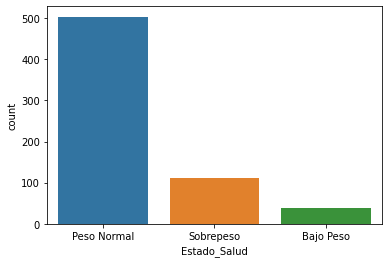

In [32]:
plt.figure()
sns.countplot(data_nutricion2['Estado_Salud'], order=data_nutricion2['Estado_Salud'].value_counts().index)

Text(0.5, 1.0, 'Gráfico Nº XX: Estado de Salud según la edad')

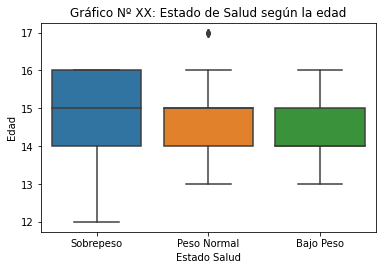

In [33]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 3.84))

g=sns.boxplot(
        x     = 'Estado_Salud',  # variable cualitativa
        y     = 'edad',  # variable cuantitativa
        data  = data_nutricion2,   # dataframe
        ax    = ax
    )

g.set_xlabel("Estado Salud")
g.set_ylabel("Edad")
g.set_title("Gráfico Nº XX: Estado de Salud según la edad")

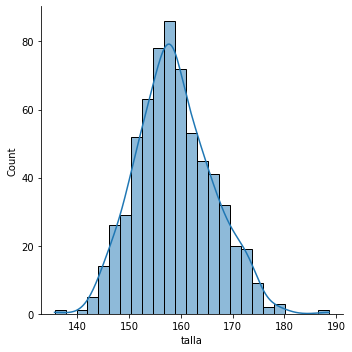

In [34]:
sns.displot(data=data_nutricion2, x="talla", kde=True)

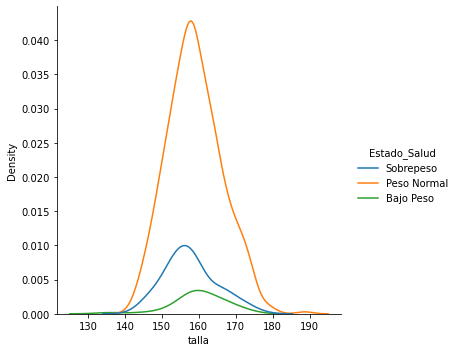

In [35]:
sns.displot(data=data_nutricion2, x="talla", hue="Estado_Salud", kind="kde")


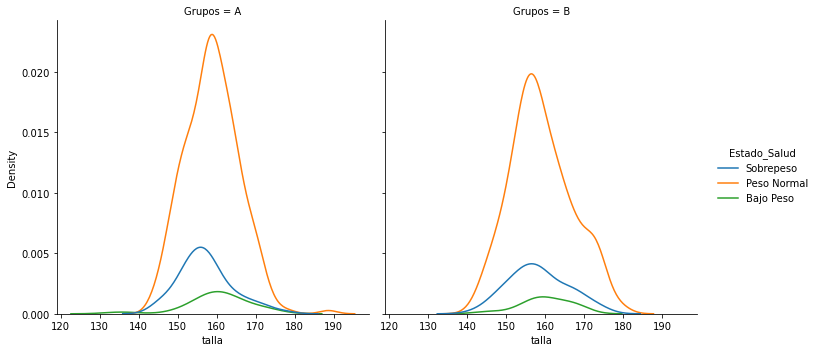

In [36]:
sns.displot(data=data_nutricion2, x="talla", hue="Estado_Salud", col="Grupos", kind="kde") # 

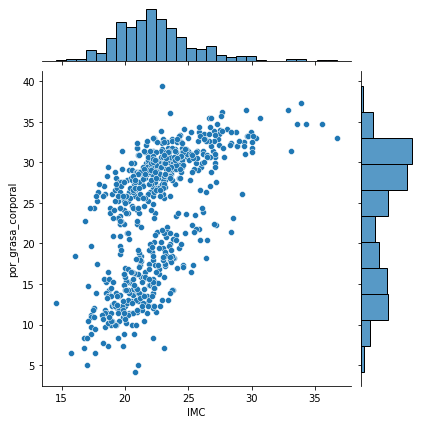

In [37]:
# Correlación

sns.jointplot(x=data_nutricion2['IMC'], y=data_nutricion2['por_grasa_corporal'])

Text(0.5, 1.0, 'Gráfico Nº XX: Gráfico de la correlación de las variables numéricas')

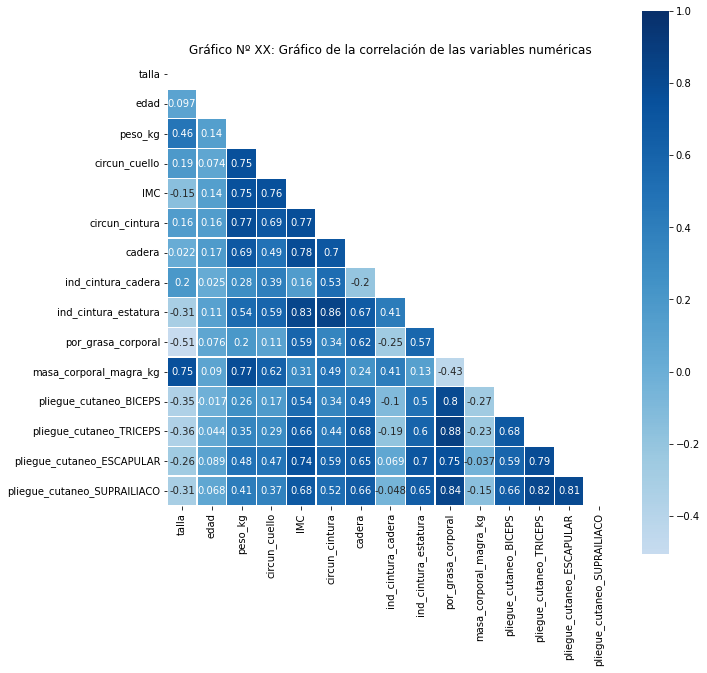

In [38]:
correlacion = data_nutricion2.corr().round(3)

mask = np.triu(np.ones_like(correlacion, dtype=bool )) #la máscara para el triángulo superior del gráfico
f, ax = plt.subplots(figsize = (10,10)) # la base para el gráfico
g = sns.heatmap(correlacion, mask = mask, cmap='Blues', vmax=1, center = 0, 
            square = True, linewidths=.1, annot=True)

g.set_title("Gráfico Nº XX: Gráfico de la correlación de las variables numéricas")

## II. Estadística inferencial

In [39]:
cols_num

Index(['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura',
       'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura',
       'por_grasa_corporal', 'masa_corporal_magra_kg',
       'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS',
       'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'],
      dtype='object')

## Visualización de Variables Numéricas

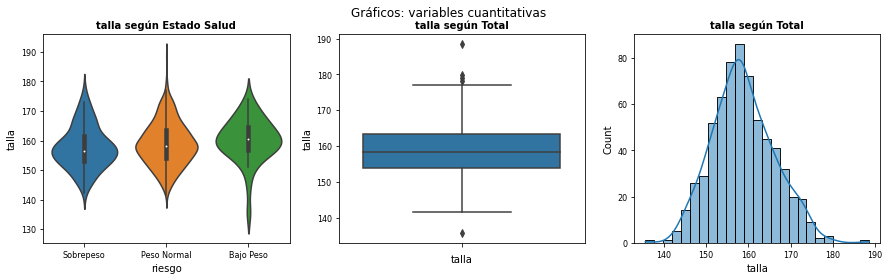

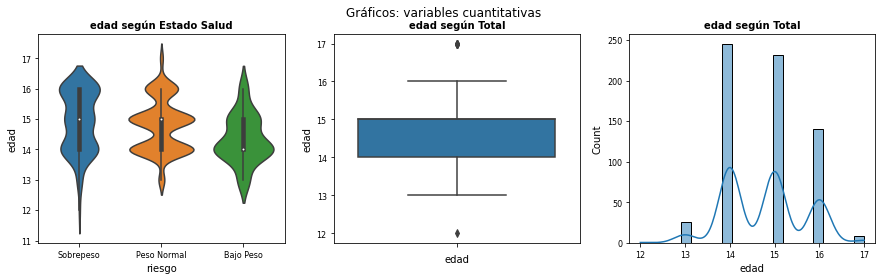

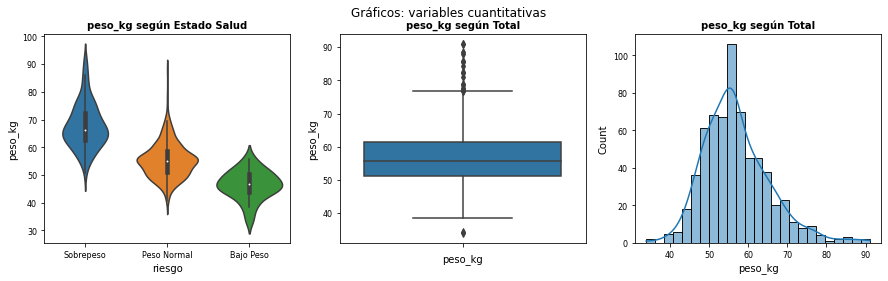

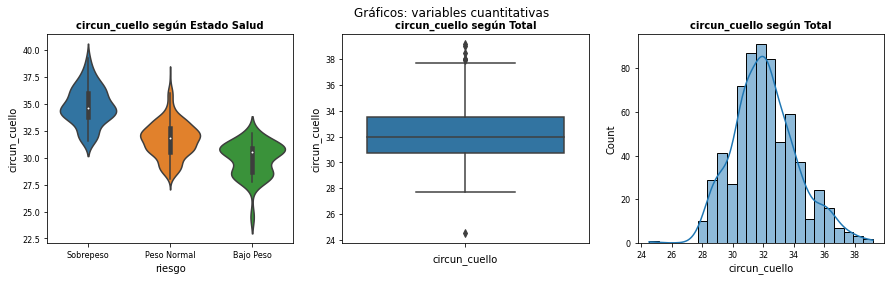

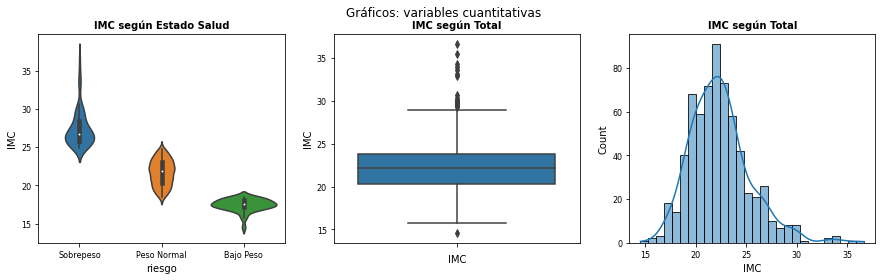

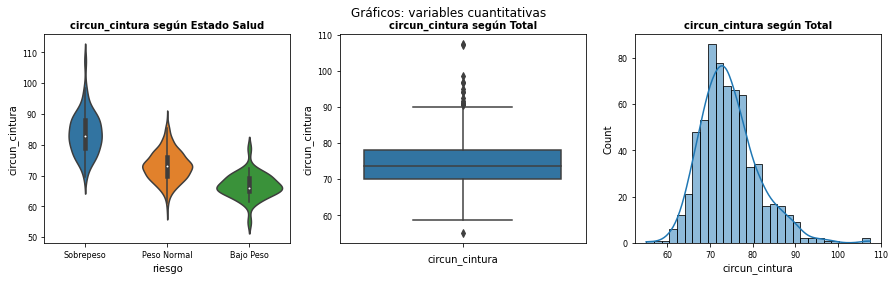

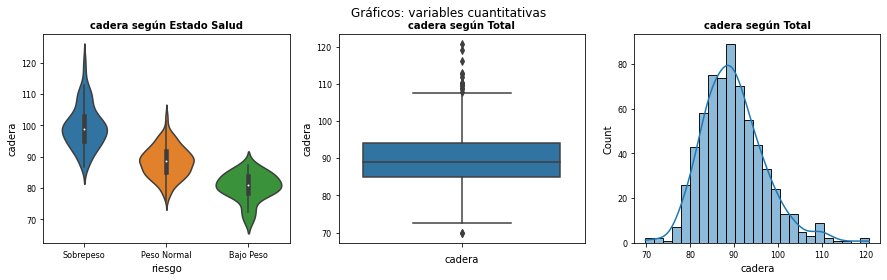

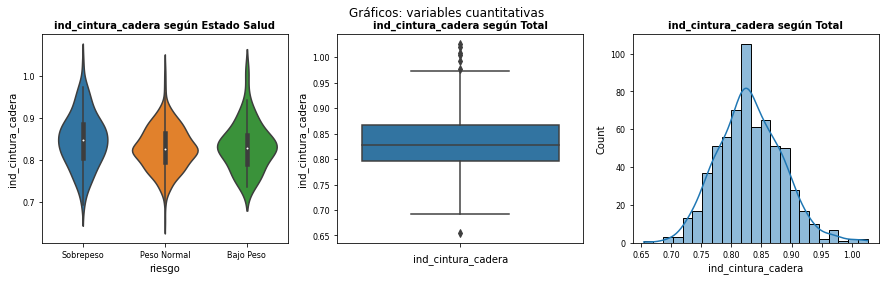

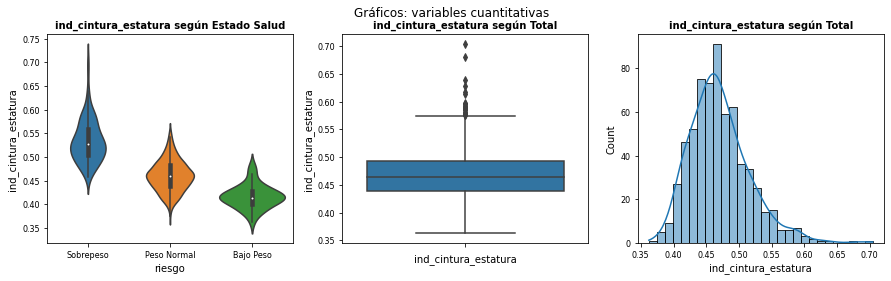

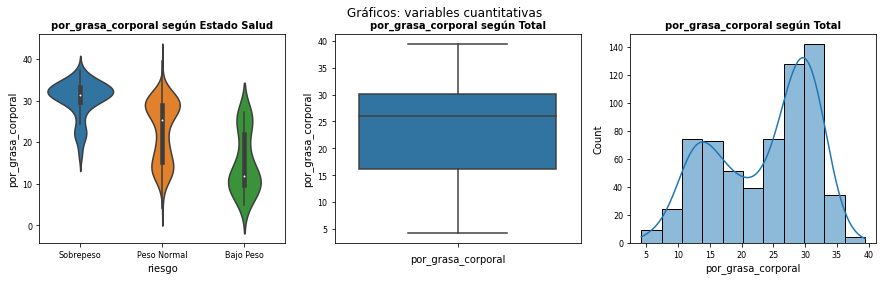

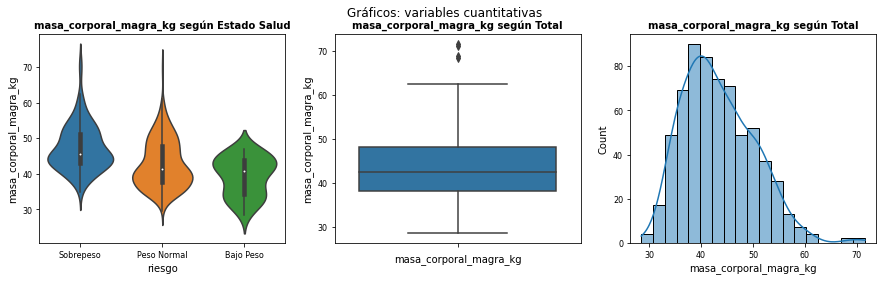

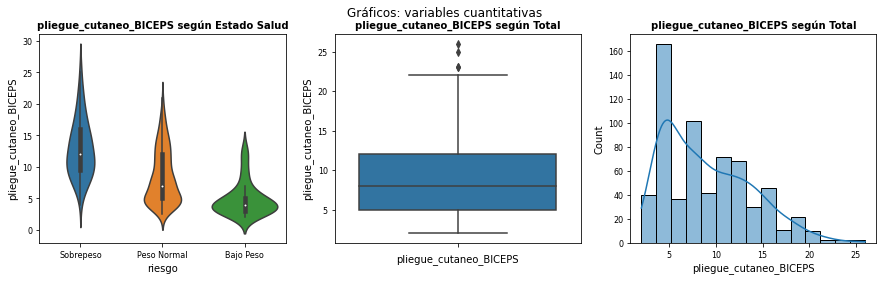

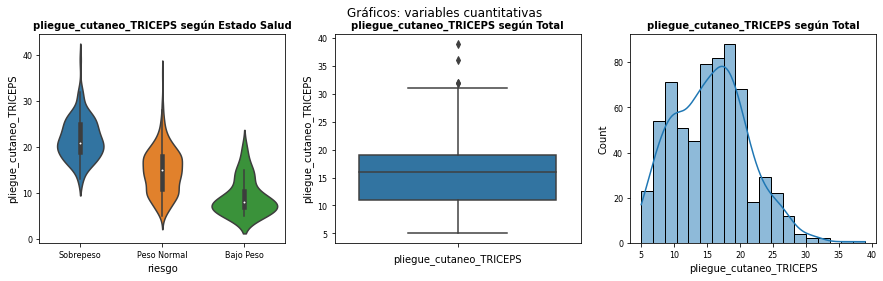

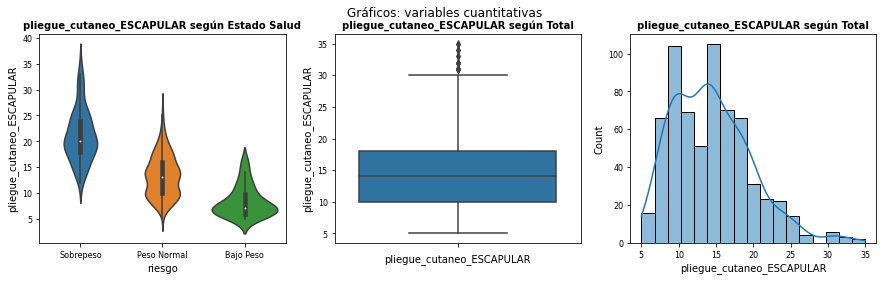

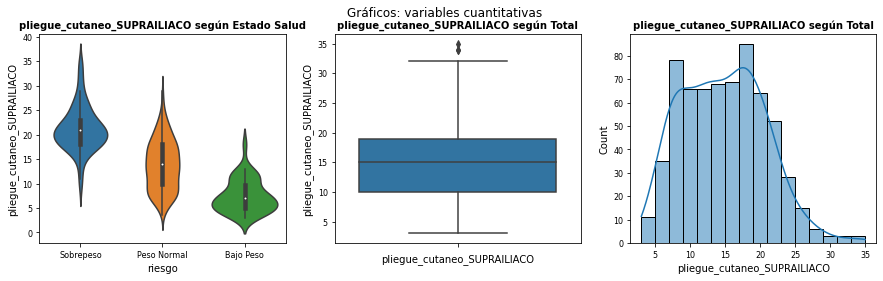

In [40]:
for i, colum in enumerate(cols_num): 
    fig, ax = plt.subplots(1, 3, figsize=(15, 3.84))
    fig.suptitle('Gráficos: variables cuantitativas')
    
    sns.violinplot(x = 'Estado_Salud', y = colum,  data  = data_nutricion2, ax=ax[0])
    ax[0].set_title(str(colum) + " según Estado Salud", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel('riesgo')

    sns.boxplot(y = colum,  data  = data_nutricion2, ax=ax[1])
    ax[1].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)

    sns.histplot(x=colum, data=data_nutricion2, kde= True, ax=ax[2])
    ax[2].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[2].tick_params(labelsize = 8)
    ax[2].set_xlabel(colum)

Visualización de variables cualitativas

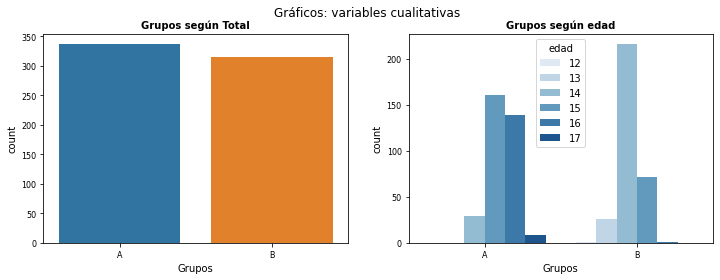

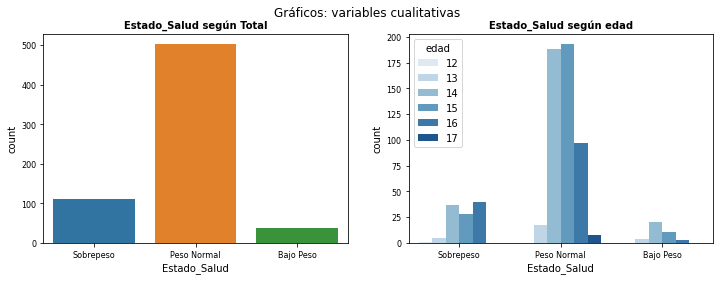

In [41]:
# Graficando las variables cualitativas

for i, colum in enumerate(cols_cat): 
    fig, ax = plt.subplots(1, 2, figsize=(12, 3.84))
    fig.suptitle('Gráficos: variables cualitativas')

    sns.countplot(x=colum, data=data_nutricion2, ax=ax[0])
    ax[0].set_title(str(colum) + " según Total", fontsize = 10, fontweight = "bold")
    ax[0].tick_params(labelsize = 8)
    ax[0].set_xlabel(colum)

    sns.countplot(x=colum, hue="edad", data=data_nutricion2, palette="Blues", ax=ax[1])
    ax[1].set_title(str(colum) + " según edad", fontsize = 10, fontweight = "bold")
    ax[1].tick_params(labelsize = 8)
    ax[1].set_xlabel(colum)
 

## Prueba de normalidad

Se tomarán las variables 
  - Talla
  - IMC
  - % Grasa Corporal
  - Cadera
  - Circunferencia de cuello

PLANTEAMIENTO DE LAS HIPóTESIS

Ho: Los datos estan normalmente distribuidos      
Ha: Los datos no estan normalmente distribuidos

Nivel de significancia = 5% (0.05)


In [42]:
#import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore
import numpy as np

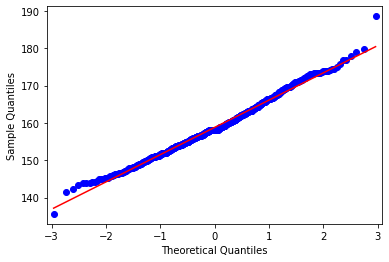

Estadisticos=1.000, p-value=0.000


In [43]:
# Prueba normalidad: talla

qqplot(data_nutricion2['talla'] , line='s')
plt.show()
#Cuando n > 50

stat1, p1 = kstest(data_nutricion2['talla'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat1, p1))

Se rechaza Ho, la variable talla no está normalmente distribuida

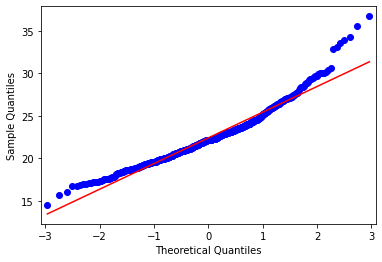

Estadisticos=1.000, p-value=0.000


In [44]:
# Prueba normalidad: IMC

qqplot(data_nutricion2['IMC'] , line='s')
plt.show()

#Cuando n > 50

stat2, p2 = kstest(data_nutricion2['IMC'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Se rechaza Ho, la variable IMC no está normalmente distribuida

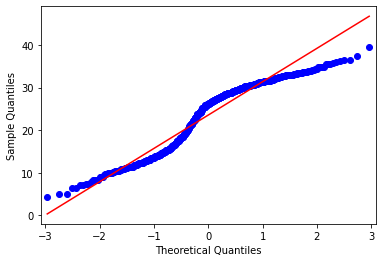

Estadisticos=1.000, p-value=0.000


In [45]:
# Prueba normalidad: %grasa corporal
qqplot(data_nutricion2['por_grasa_corporal'] , line='s')
plt.show()

#Cuando n > 50

stat3, p3 = kstest(data_nutricion2['por_grasa_corporal'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat3, p3))

Se rechaza Ho, la variable %Grasa Corporal no está normalmente distribuida

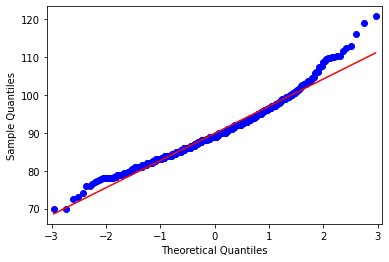

Estadisticos=1.000, p-value=0.000


In [46]:
# Prueba normalidad: cadera

qqplot(data_nutricion2['cadera'] , line='s')
plt.show()

#Cuando n > 50

stat4, p4 = kstest(data_nutricion2['cadera'] , 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat4, p4))

Se rechaza Ho, la variable cadera no está normalmente distribuida

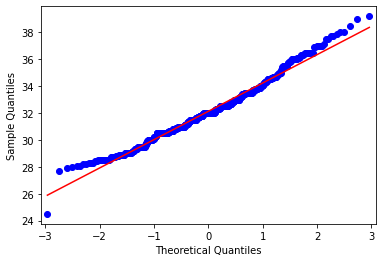

Estadisticos=1.000, p-value=0.000


In [47]:
# Prueba normalidad: cadera

qqplot(data_nutricion2['circun_cuello'] , line='s')
plt.show()

#Cuando n > 50

stat5, p5 = kstest(data_nutricion2['circun_cuello'], 'norm')

print('Estadisticos=%.3f, p-value=%.3f' % (stat5, p5))

Se rechaza Ho, la variable circunferencia cuello no está normalmente distribuida

In [48]:
data_nutricion5var=data_nutricion2.loc[:,['talla','IMC','por_grasa_corporal','cadera','circun_cuello']]
data_nutricion5var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   talla               652 non-null    float64
 1   IMC                 652 non-null    float64
 2   por_grasa_corporal  652 non-null    float64
 3   cadera              652 non-null    float64
 4   circun_cuello       652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


## A. Normalizando variables / transformadas

normalización = ( x – min(x) ) / ( max(x) – min(x) )

Los valores normalizados para todos los demás valores del conjunto de datos estarán entre 0 y 1.

In [49]:
# Normalizamos las variables numéricas

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_nutricion5var_norm = scaler.fit_transform(data_nutricion5var)
data_nutricion5var_norm


array([[0.37924528, 0.67829486, 0.91487376, 0.55294118, 0.76190476],
       [0.58301887, 0.35302515, 0.6975795 , 0.60196078, 0.49659864],
       [0.29622642, 0.31959639, 0.72814081, 0.31764706, 0.40816327],
       ...,
       [0.34716981, 0.37128037, 0.63607307, 0.51372549, 0.47619048],
       [0.73018868, 0.56317691, 0.5168803 , 0.61176471, 0.85034014],
       [0.42264151, 0.38498255, 0.80334806, 0.4745098 , 0.57823129]])

In [50]:
data_nutricion5var_norm = pd.DataFrame(
    data=data_nutricion5var_norm,
    columns=['talla','IMC','por_grasa_corporal','cadera','circun_cuello'])
data_nutricion5var_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   talla               652 non-null    float64
 1   IMC                 652 non-null    float64
 2   por_grasa_corporal  652 non-null    float64
 3   cadera              652 non-null    float64
 4   circun_cuello       652 non-null    float64
dtypes: float64(5)
memory usage: 25.6 KB


### Prueba de Correlacion: No parametrica


Ho: Las variables A y B son mutuamente independientes.

Ha: Las variables A y B son mutuamente dependientes.

Nivel de significancia: 5%

Correlación Rho=-0.186, p-value=0.000


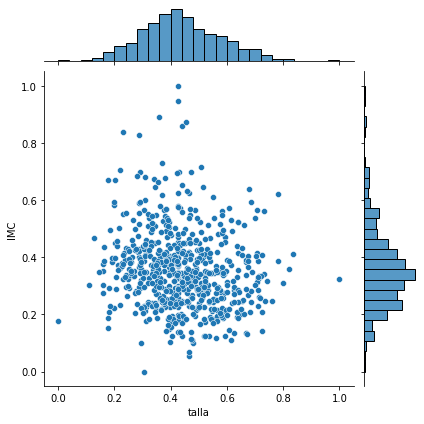

In [52]:
from scipy.stats import pearsonr, spearmanr

# Graficamos las variables a correlacionar
sns.jointplot(x=data_nutricion5var_norm['talla'], y=data_nutricion5var_norm['IMC'])

# Correlación spearmanr
rho, p = spearmanr(data_nutricion5var['talla'], data_nutricion5var['IMC'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Rechazamos Ho, las variables talla e IMC son mutuamente dependientes

Correlación Rho=0.652, p-value=0.000


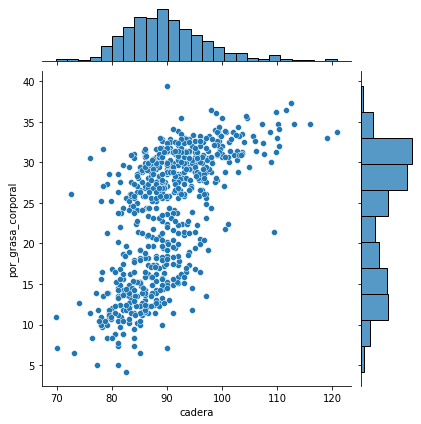

In [53]:
# Graficamos las variables a correlacionar

sns.jointplot(x=data_nutricion5var['cadera'], y=data_nutricion5var['por_grasa_corporal'])

# Correlación spearmanr

rho, p = spearmanr(data_nutricion5var['cadera'], data_nutricion5var['por_grasa_corporal'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Rechazamos Ho, las variables cadera y porcentaje de grasa corporal son mutuamente dependientes

Correlación Rho=0.182, p-value=0.000


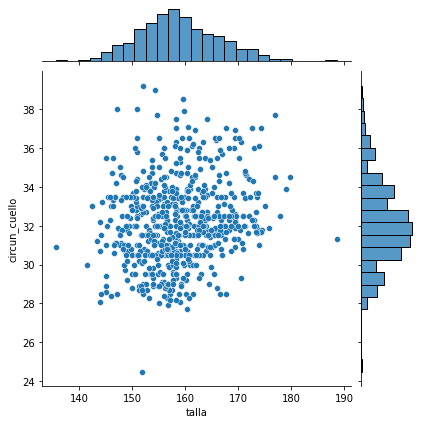

In [54]:
# Graficamos las variables a correlacionar

sns.jointplot(x=data_nutricion5var['talla'], y=data_nutricion5var['circun_cuello'])

# Correlación spearmanr

rho, p = spearmanr(data_nutricion5var['talla'], data_nutricion5var['circun_cuello'])

print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))

Rechazamos Ho, las variables talla y circunferencia de cuello son mutuamente dependientes